# Analyzing Employee Exit Surveys - Part 2

In this project, I am working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

### I am going to analyse if:
- employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
- They want us to combine the results for both surveys to answer these questions.

### This is the second part of the project. In this notebook I will work with the already cleaned and aggregated data to answer the questions above. The data cleaning process can be found in exit_surveys_cleaning.ipynb

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

# Run data cleaning script

In [31]:
run clean_exit_surveys.py

/Users/joelschnitter/python/dataquest/data cleaning_exit surveys/clean_exit_surveys.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_up['institute_service'] = combined['institute_service'].astype('str')
/Users/joelschnitter/python/dataquest/data cleaning_exit surveys/clean_exit_surveys.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_up['institute_service'] = combined_up['institute_service'].str.replace("Less than 1 year", "0.0", regex = False)
/Users/joelschnitter/python/dataque

# Importing Cleaned data set

In [35]:
df = pd.read_csv('aggregated_cleaned_data.csv')
df.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfaction,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,experienced


In [97]:
df['dissatisfaction'].value_counts()

False    411
True     240
Name: dissatisfaction, dtype: int64

## Dissatisfaction as a function of service time and institute
pivot table of mean dissatisfaction for time of employment and institute

In [112]:
# considering time of employment as well as the institute
pivot = pd.pivot_table(df, values = 'dissatisfaction', index = ['service_cat', 'institute'], aggfunc = np.sum)
print(sum(pivot['dissatisfaction']))
pivot

240


dissatisfaction
service_cat institute                 
established DETE                    25
            TAFE                     7
experienced DETE                    35
            TAFE                    24
new         DETE                    33
            TAFE                    50
veteran     DETE                    56
            TAFE                    10

### update pivot table to include percentages

In [113]:
# updated pivot-dataframe with reset index
pivot_up = pivot.reset_index().copy() # reset index
# percentage of dissatisfaction column
pivot_up['dissatisfaction_percent'] = pivot_up['dissatisfaction'] / sum(pivot_up['dissatisfaction'])
print(sum(pivot_up['dissatisfaction_percent'])) # double check - should be 1
pivot_up

0.9999999999999999


,service_cat,institute,dissatisfaction,dissatisfaction_percent
0,established,DETE,25,0.104167
1,established,TAFE,7,0.029167
2,experienced,DETE,35,0.145833
3,experienced,TAFE,24,0.100000
4,new,DETE,33,0.137500
5,new,TAFE,50,0.208333
6,veteran,DETE,56,0.233333
7,veteran,TAFE,10,0.041667


# Data Visualisation

### Overview of total employees who left due to dissatisfaction

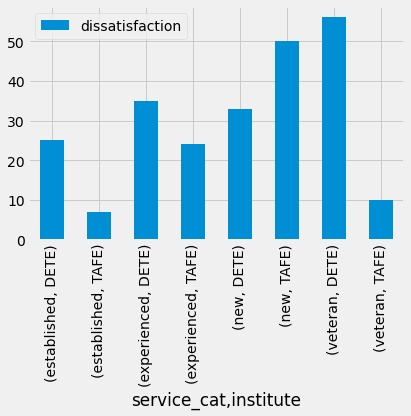

In [115]:
style.use('fivethirtyeight')
pivot.plot(kind = 'bar')
plt.show()

### Overview of `Total Number` of  Employees that left due to Dissatisfaction
Stacked barchart of DETE and TAFE on top of each other

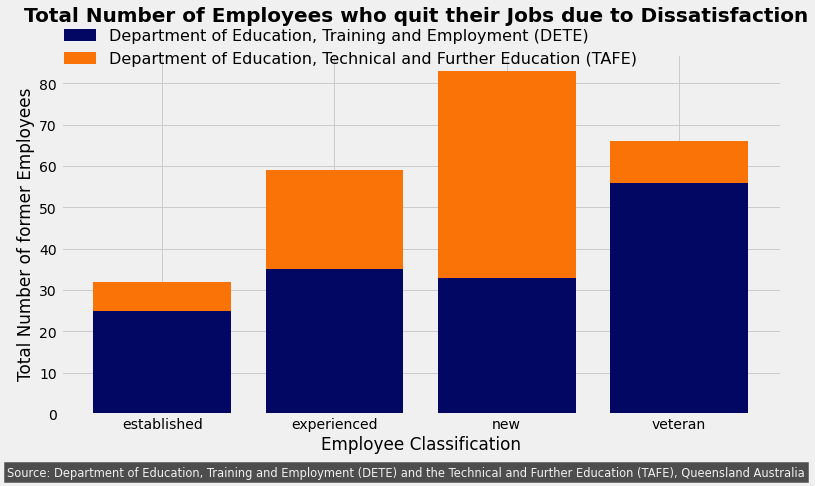

In [266]:
#filter for dissatisfaction score for each institute - turn into numpy arrays

x = np.array(['established', 'experienced', 'new', 'veteran']) # xaxis
y1 = np.array(pivot_up[pivot_up['institute'] == 'DETE']['dissatisfaction']) # yvals 1
y2 = np.array(pivot_up[pivot_up['institute'] == 'TAFE']['dissatisfaction']) # yvals 2

### start of plotscript ### 

style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
    
# plot bars in stacked manner
ax.bar(x, y1, color='#030764', label = 'Department of Education, Training and Employment (DETE)')
ax.bar(x, y2, bottom=y1, color='#F97306',label = 'Department of Education, Technical and Further Education (TAFE)')

ax.set_xlabel('Employee Classification') #x-axis label
ax.set_ylabel('Total Number of former Employees') #y-axis label

fig.legend(bbox_to_anchor=(0.82, 1.11), loc=1, frameon=False, fontsize=16) # legend

# header
ax.text(-0.8, 95,'Total Number of Employees who quit their Jobs due to Dissatisfaction', \
       fontsize=20, weight='bold')

# subheader
#ax.text(-1, 0.38, ' '*60 + 'DETE and TAFE Data', fontsize=14, weight='bold') 

# signature
plt.text(-0.9, -15, 'Source: Department of Education, \
Training and Employment (DETE) and the Technical and Further Education (TAFE), Queensland Australia', \
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=11.5)

plt.show()

### Overview of `Percentage` of  Employees that left due to Dissatisfaction
Stacked barchart of DETE and TAFE on top of each other

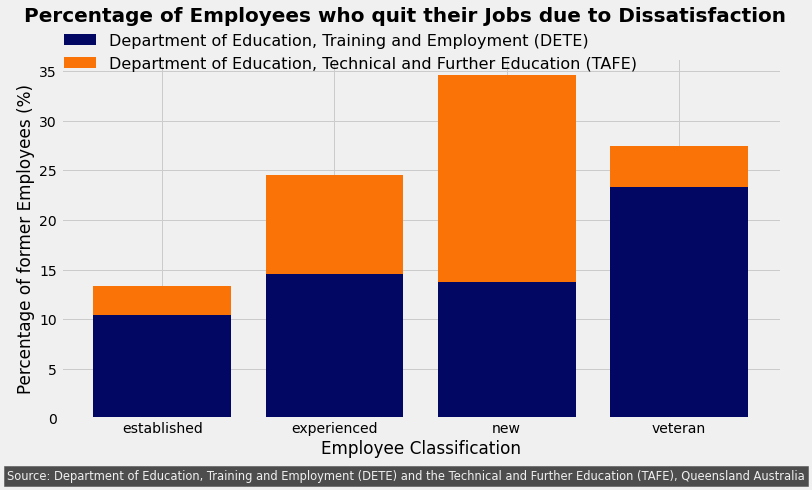

In [260]:
#filter for dissatisfaction score for each institute - turn into numpy arrays
x = np.array(['established', 'experienced', 'new', 'veteran']) # xaxis
y1 = np.array(pivot_up[pivot_up['institute'] == 'DETE']['dissatisfaction_percent']) *100 # yvals 1
y2 = np.array(pivot_up[pivot_up['institute'] == 'TAFE']['dissatisfaction_percent']) *100# yvals 2

### start of plotscript ### 

style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
    
# plot bars in stacked manner
ax.bar(x, y1, color='#030764', label = 'Department of Education, Training and Employment (DETE)')
ax.bar(x, y2, bottom=y1, color='#F97306',label = 'Department of Education, Technical and Further Education (TAFE)')

ax.set_xlabel('Employee Classification') #x-axis label
ax.set_ylabel('Percentage of former Employees (%)') #y-axis label

fig.legend(bbox_to_anchor=(0.82, 1.11), loc=1, frameon=False, fontsize=16) # legend

# header
ax.text(-0.8, 40,'Percentage of Employees who quit their Jobs due to Dissatisfaction', \
       fontsize=20, weight='bold')

# subheader
#ax.text(-1, 0.38, ' '*60 + 'DETE and TAFE Data', fontsize=14, weight='bold') 

# signature
plt.text(-0.9, -6.2, 'Source: Department of Education, \
Training and Employment (DETE) and the Technical and Further Education (TAFE), Queensland Australia', \
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=11.5)

plt.show()

# Conclusion:

Being agnostic to the two different institutes, the largest group of disgruntled employees are new ones. They make up 34% (83 total) of all employes that left. The second largest group of dissatisfied former employees are vetereans. They make up 66 former employees which amounts to 27% of all.

However, upon considering the different institutes, we arrive at a more nuanced conclusion. At DETE, the largest group of dissatisfied former colleagues are veterans (56 total, 23%). At TAFE, on the other hand, the majority of disgruntled ex employees are new ones (50 total, 21%).

This can be observed very well in the charts that combine both TAFE and DETE data.